In [1]:
import selectivesearch
from torch_snippets import *
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
from torchvision.ops import nms

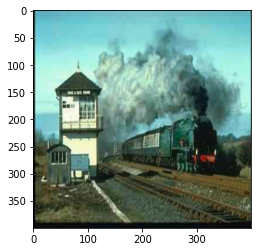

In [2]:
img = plt.imread('./images/corel/0002_0004.png')
plt.imshow(img)
plt.show()

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


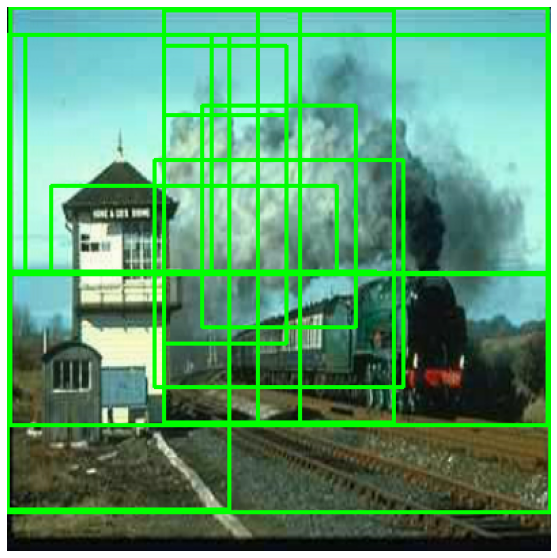

In [3]:
def extract_candidates(img, min_area_perc, max_area_perc):
    # select candidate objects by stopping calculation for a given min_size. 
    # A Gaussian filter of a given sigma reduces artifacts and scale indicates preferences to bigger 
    # or smaller objects 
    img_lbl, boxes = selectivesearch.selective_search(img, scale=200, sigma=0.6, min_size=300) 
    

    area = img.shape[0]*img.shape[1]    
    candidates = []    
    for r in boxes:
        if ((r['rect'] in candidates) or 
            (r['size'] < int(min_area_perc*area)) or 
            (r['size'] > int(max_area_perc*area))): 
            continue
        x, y, w, h = r['rect']
        candidates.append([x, y, w, h])
    return(candidates)

boxes = extract_candidates(img,0.10, 0.60)
show(img, bbs=boxes)
